<a href="https://colab.research.google.com/github/SharkpJIM/matpower/blob/master/Santa2025CTPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

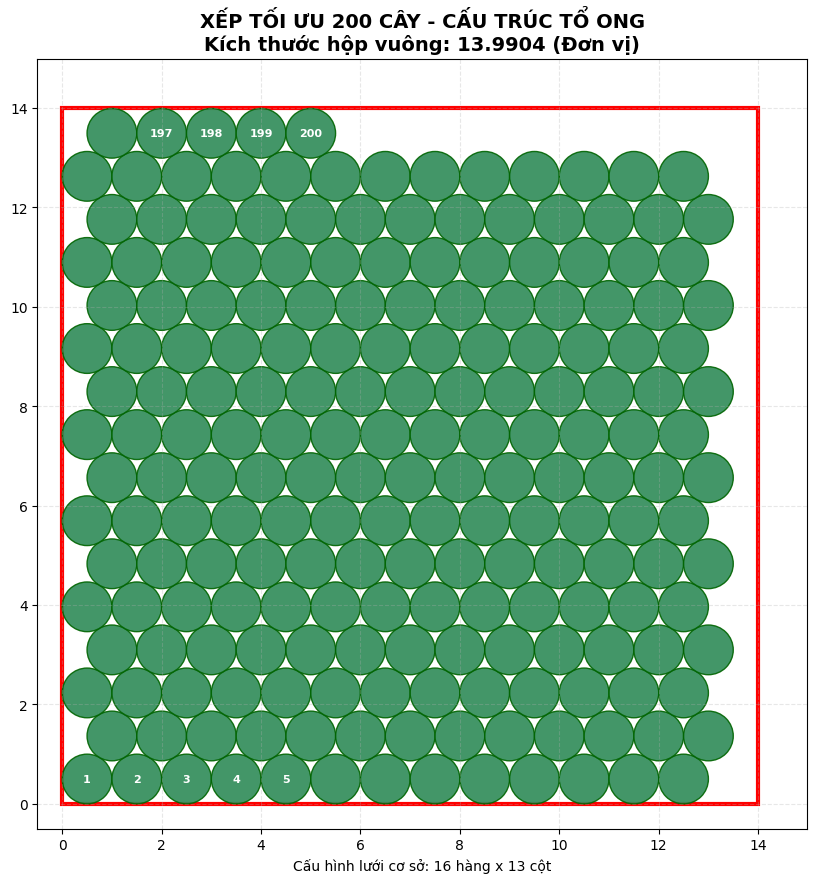

🎄 Đã tìm thấy giải pháp tối ưu cho 200 cây!
📦 Cạnh hộp vuông nhỏ nhất (s): 13.9904
📐 Mật độ lấp đầy: 80.25291%


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
def generate_hex_coords(rows, cols, radius):
    """Tạo tọa độ cho lưới lục giác với số hàng và số cột nhất định."""
    coords = []
    d = 2 * radius
    dy = d * math.sqrt(3) / 2  # Khoảng cách giữa các hàng
    for r in range(rows):
        y = radius + r * dy
        # Hàng lẻ thụt vào (stagger)
        offset = radius if (r % 2 == 1) else 0
        for c in range(cols):
            x = radius + c * d + offset
            coords.append((x, y))
    return coords
def solve_santa_packing_optimized(n_trees=200, radius=0.5):
    """
    Tìm cấu hình hàng/cột tối ưu để hộp bao quanh là hình vuông nhỏ nhất.
    """
    best_s = float('inf')
    best_coords = []
    best_config = (0, 0)
    # Thử nghiệm các tổ hợp hàng/cột để tìm ra hình vuông tốt nhất
    # Chúng ta quét xung quanh căn bậc 2 của N
    root = int(math.sqrt(n_trees))

    # Quét rộng ra để đảm bảo không bỏ sót cấu hình tốt (từ root-5 đến root+10)
    for r_rows in range(root - 5, root + 15):
        if r_rows < 1:
            continue
        # Tính số cột cần thiết để chứa đủ N cây
        # Một hàng có thể chứa c hoặc c-1 cây tùy vào stagger
        # Công thức ước lượng: r_rows * c_cols >= n_trees
        min_cols = math.ceil(n_trees / r_rows)
        for c_cols in range(min_cols - 2, min_cols + 3):
            if c_cols < 1:
                continue
            # Tạo tọa độ
            coords = generate_hex_coords(r_rows, c_cols, radius)
            # Lấy đúng n_trees cây đầu tiên
            if len(coords) < n_trees:
                continue
            current_coords = coords[:n_trees]
            # Tính kích thước hộp bao quanh (Bounding Box)
            max_x = max(c[0] for c in current_coords) + radius
            max_y = max(c[1] for c in current_coords) + radius

            # Chúng ta cần hộp VUÔNG, nên cạnh phải là max(width, height)
            current_s = max(max_x, max_y)
            # Nếu tìm thấy hộp nhỏ hơn kỷ lục cũ, lưu lại
            if current_s < best_s:
                best_s = current_s
                best_coords = current_coords
                best_config = (r_rows, c_cols)
    return best_coords, best_s, best_config
# --- THIẾT LẬP THÔNG SỐ ---
N_TREES = 200
RADIUS = 0.5 # Đường kính = 1
# 1. Chạy thuật toán tối ưu
coordinates, box_size, config = solve_santa_packing_optimized(N_TREES, RADIUS)
# 2. Vẽ kết quả
fig, ax = plt.subplots(figsize=(10, 10))
# Vẽ hộp vuông
square_box = patches.Rectangle((0,0), box_size, box_size, linewidth=3, edgecolor='red', facecolor='none', label='Hộp quà')
ax.add_patch(square_box)
# Vẽ các cây thông
for i, (x, y) in enumerate(coordinates):
    # Vẽ tán cây
    circle = patches.Circle((x, y), RADIUS, edgecolor='darkgreen', facecolor='#2E8B57', alpha=0.9)
    ax.add_patch(circle)
    # Đánh số (nếu cần kiểm tra thứ tự)
    if i < 5 or i > N_TREES - 5: # Chỉ đánh số vài cây đầu/cuối để đỡ rối
        ax.text(x, y, str(i+1), color='white', fontsize=8, ha='center', va='center', weight='bold')
# Trang trí biểu đồ
ax.set_xlim(-0.5, box_size + 1)
ax.set_ylim(-0.5, box_size + 1)
ax.set_aspect('equal')
plt.title(f"XẾP TỐI ƯU {N_TREES} CÂY - CẤU TRÚC TỔ ONG\nKích thước hộp vuông: {box_size:.4f} (Đơn vị)", fontsize=14, fontweight='bold')
plt.xlabel(f"Cấu hình lưới cơ sở: {config[0]} hàng x {config[1]} cột")
plt.grid(True, linestyle='--', alpha=0.3)
# Hiển thị
plt.show()
print(f"🎄 Đã tìm thấy giải pháp tối ưu cho {N_TREES} cây!")
print(f"📦 Cạnh hộp vuông nhỏ nhất (s): {box_size:.4f}")
print(f"📐 Mật độ lấp đầy: {(N_TREES * math.pi * RADIUS**2) / (box_size**2) * 100:.5f}%")

In [7]:
import math
import csv
from google.colab import files
# Tải xuống tệp submission.csv
files.download('submission.csv')
def solve_packing_for_n(n_trees, radius=0.5):
    """
    Tìm tọa độ tối ưu cho n_trees, căn giữa tại (0,0).
    Trả về danh sách các tuple (x, y).
    """
    if n_trees == 1:
        return [(0.0, 0.0)]
    best_s = float('inf')
    best_coords = []
    # Tìm kiếm cấu hình Lục giác tốt nhất
    # Quét các tỷ lệ hàng/cột khác nhau
    root = int(math.sqrt(n_trees))
    # Phạm vi quét linh hoạt để tìm hình vuông tốt nhất
    min_r = max(1, root - 5)
    max_r = root + 15
    for r_rows in range(min_r, max_r):
        min_cols = math.ceil(n_trees / r_rows)
        for c_cols in range(min_cols - 2, min_cols + 5):
            if c_cols < 1:
                continue
            coords = []
            d = 2 * radius
            dy = d * math.sqrt(3) / 2

            # Tạo lưới lục giác
            for r in range(r_rows):
                y = radius + r * dy
                offset = radius if (r % 2 == 1) else 0
                for c in range(c_cols):
                    x = radius + c * d + offset
                    coords.append((x, y))
            if len(coords) < n_trees:
                continue
            # Lấy đúng n cây đầu tiên
            current_coords = coords[:n_trees]
            # Tính biên (Bounding Box)
            xs = [c[0] for c in current_coords]
            ys = [c[1] for c in current_coords]
            min_x, max_x = min(xs) - radius, max(xs) + radius
            min_y, max_y = min(ys) - radius, max(ys) + radius
            width = max_x - min_x
            height = max_y - min_y
            s = max(width, height)
            if s < best_s:
                best_s = s
                # Căn giữa về (0,0)
                center_x = (min_x + max_x) / 2
                center_y = (min_y + max_y) / 2
                best_coords = [(cx - center_x, cy - center_y) for cx, cy in current_coords]
    return best_coords
# --- CHƯƠNG TRÌNH CHÍNH ---
output_filename = 'submission.csv'
total_rows = 0
print("🎄 Đang khởi động dây chuyền đóng gói...")
with open(output_filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # 1. Ghi tiêu đề (Header)
    writer.writerow(['id', 'x', 'y', 'deg'])
    # 2. Vòng lặp từ 1 đến 200 cây
    for n in range(1, 201):
        # Tính toán tọa độ cho trường hợp n cây
        coords = solve_packing_for_n(n)
        # Ghi từng cây vào file
        for i, (x, y) in enumerate(coords):
            # Format ID: ví dụ 005_0, 005_1...
            row_id = f"{n:03d}_{i}"
            # Format dữ liệu có tiền tố 's'
            s_x = f"s{x:.18f}" # Độ chính xác cao
            s_y = f"s{y:.18f}"
            s_deg = "s0.0"     # Mặc định xoay 0 độ
            writer.writerow([row_id, s_x, s_y, s_deg])
            total_rows += 1
        # Báo cáo tiến độ mỗi 20 trường hợp
        if n % 20 == 0:
            print(f"   - Đã đóng gói xong trường hợp {n} cây.")
print("-" * 40)
print(f"✅ HOÀN THÀNH! Đã tạo file '{output_filename}'")
print(f"📊 Tổng số dòng dữ liệu: {total_rows} (Khớp yêu cầu 20100!)")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎄 Đang khởi động dây chuyền đóng gói...
   - Đã đóng gói xong trường hợp 20 cây.
   - Đã đóng gói xong trường hợp 40 cây.
   - Đã đóng gói xong trường hợp 60 cây.
   - Đã đóng gói xong trường hợp 80 cây.
   - Đã đóng gói xong trường hợp 100 cây.
   - Đã đóng gói xong trường hợp 120 cây.
   - Đã đóng gói xong trường hợp 140 cây.
   - Đã đóng gói xong trường hợp 160 cây.
   - Đã đóng gói xong trường hợp 180 cây.
   - Đã đóng gói xong trường hợp 200 cây.
----------------------------------------
✅ HOÀN THÀNH! Đã tạo file 'submission.csv'
📊 Tổng số dòng dữ liệu: 20100 (Khớp yêu cầu 20100!)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Đang đọc dữ liệu từ submission.csv...
🎨 Đang vẽ ảnh cho 16 cây...


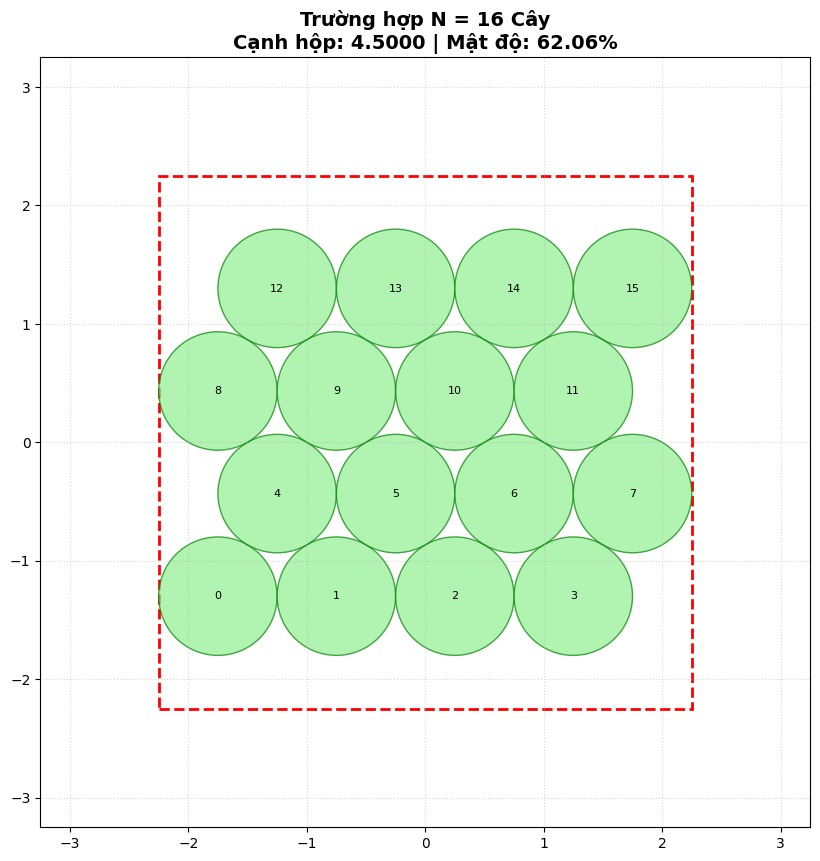

✅ Đã lưu ảnh: packing_images/packing_016.png
🎨 Đang vẽ ảnh cho 50 cây...


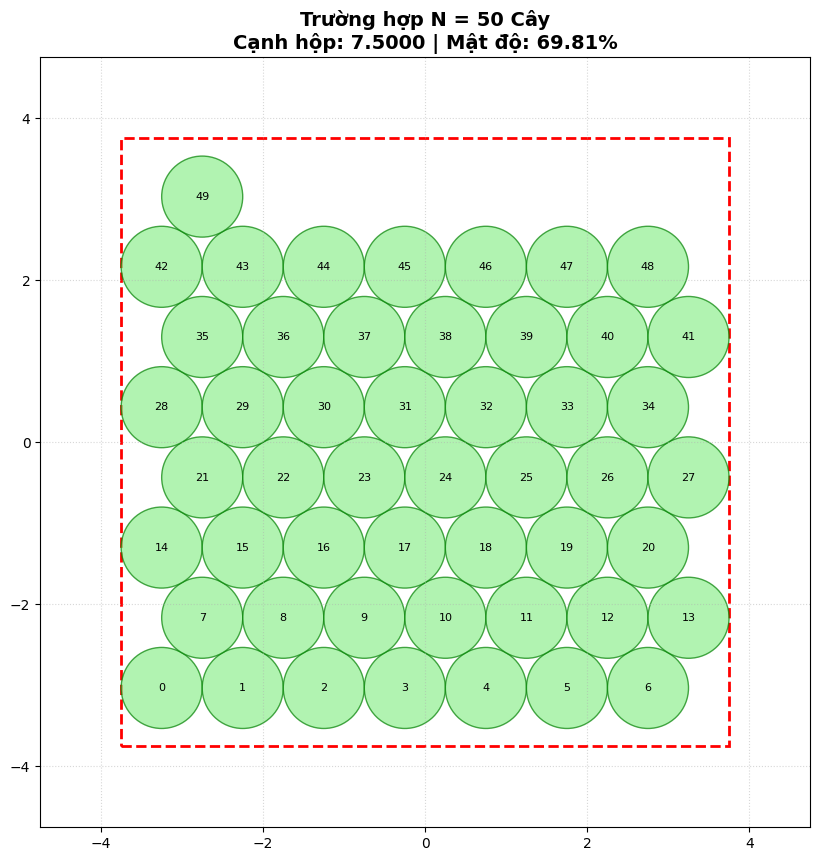

✅ Đã lưu ảnh: packing_images/packing_050.png
🎨 Đang vẽ ảnh cho 100 cây...


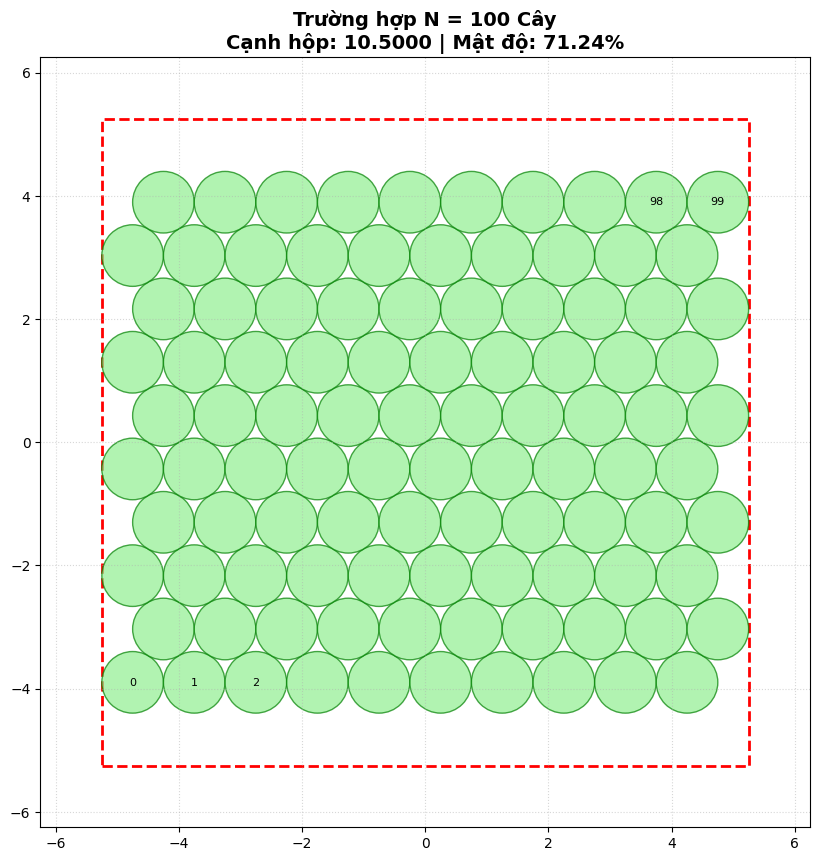

✅ Đã lưu ảnh: packing_images/packing_100.png
🎨 Đang vẽ ảnh cho 200 cây...


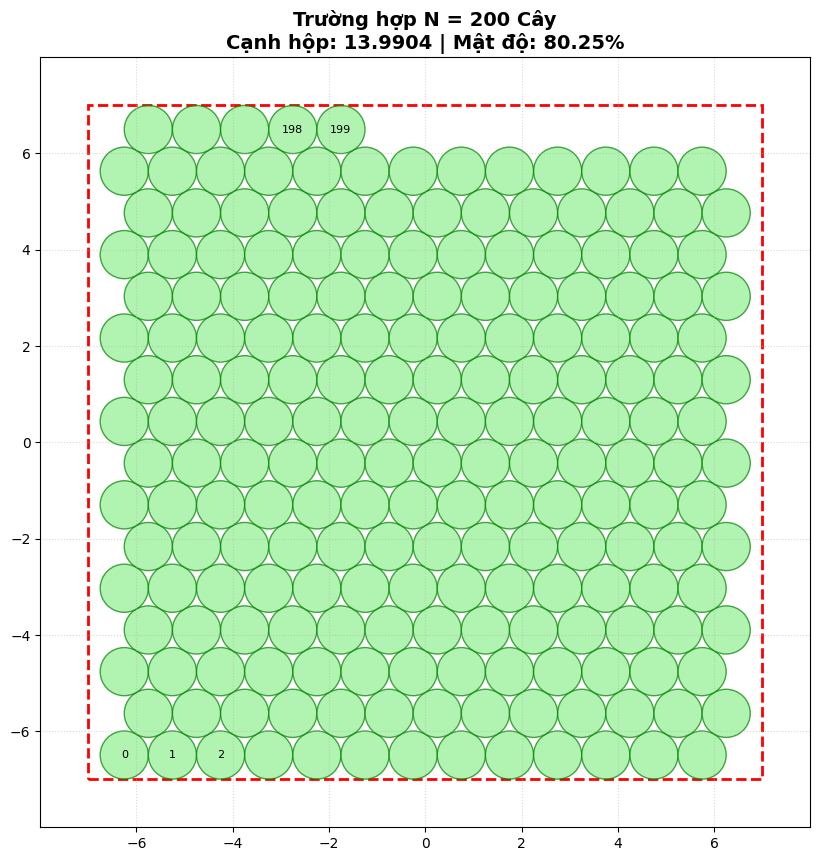

✅ Đã lưu ảnh: packing_images/packing_200.png


In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import math
import os
from google.colab import files
# Tải xuống tệp submission.csv
files.download('submission.csv')
# --- CẤU HÌNH ---
INPUT_FILE = 'submission.csv'
IMG_OUTPUT_DIR = 'packing_images' # Thư mục lưu ảnh
RADIUS = 0.5
# Tạo thư mục lưu ảnh nếu chưa có
if not os.path.exists(IMG_OUTPUT_DIR):
    os.makedirs(IMG_OUTPUT_DIR)
def parse_float(s_val):
    """Chuyển đổi chuỗi định dạng 's1.234' thành số thực 1.234"""
    return float(s_val.replace('s', ''))
def visualize_specific_case(target_n_list):
    """
    Vẽ sơ đồ đóng gói cho các trường hợp N nằm trong danh sách target_n_list.
    Đọc dữ liệu trực tiếp từ file submission.csv
    """
    print(f"📂 Đang đọc dữ liệu từ {INPUT_FILE}...")
    # Từ điển lưu tọa độ: data[n] = [(x1, y1), (x2, y2)...]
    data = {}
    try:
        with open(INPUT_FILE, 'r') as f:
            reader = csv.DictReader(f)
            for row in reader:
                # Parse ID để lấy số lượng cây (ví dụ: 200_15 -> n=200)
                row_id = row['id']
                n_trees = int(row_id.split('_')[0])

                # Chỉ lấy dữ liệu của những N mình cần vẽ
                if n_trees in target_n_list:
                    if n_trees not in data:
                        data[n_trees] = []

                    x = parse_float(row['x'])
                    y = parse_float(row['y'])
                    data[n_trees].append((x, y))
    except FileNotFoundError:
        print(f"❌ Lỗi: Không tìm thấy file {INPUT_FILE}. Hãy chạy code tạo CSV trước!")
        return
    # Bắt đầu vẽ từng trường hợp
    for n in target_n_list:
        if n not in data:
            print(f"⚠️ Không tìm thấy dữ liệu cho N={n} trong file CSV.")
            continue
        coords = data[n]
        print(f"🎨 Đang vẽ ảnh cho {n} cây...")

        # Tính toán kích thước hộp bao quanh (Bounding Box)
        xs = [c[0] for c in coords]
        ys = [c[1] for c in coords]
        min_x, max_x = min(xs) - RADIUS, max(xs) + RADIUS
        min_y, max_y = min(ys) - RADIUS, max(ys) + RADIUS
        width = max_x - min_x
        height = max_y - min_y
        box_size = max(width, height)
        # Tính mật độ (Density)
        items_area = n * math.pi * (RADIUS ** 2)
        box_area = box_size ** 2
        density = (items_area / box_area) * 100
        # --- VẼ BIỂU ĐỒ ---
        fig, ax = plt.subplots(figsize=(10, 10))

        # 1. Vẽ Hộp (Hình vuông màu đỏ)
        # Vì tọa độ đã căn giữa (0,0), ta vẽ hộp dựa trên tâm
        rect = patches.Rectangle((-box_size/2, -box_size/2), box_size, box_size,
                                 linewidth=2, edgecolor='red', facecolor='none', linestyle='--', label='Hộp')
        ax.add_patch(rect)
        # 2. Vẽ các cây (Hình tròn)
        for i, (x, y) in enumerate(coords):
            circle = patches.Circle((x, y), RADIUS, edgecolor='green', facecolor='#90EE90', alpha=0.7)
            ax.add_patch(circle)
            # Ghi số thứ tự cây (nếu ít cây thì ghi cho đỡ rối, hoặc ghi 5 cây đầu/cuối)
            if n <= 50 or i < 3 or i > n-3:
                ax.text(x, y, str(i), color='black', fontsize=8, ha='center', va='center')
        # Trang trí
        ax.set_aspect('equal')
        # Set giới hạn trục để nhìn thấy hết hộp
        limit = box_size / 2 + 1
        ax.set_xlim(-limit, limit)
        ax.set_ylim(-limit, limit)
        title_text = (f"Trường hợp N = {n} Cây\n"
                      f"Cạnh hộp: {box_size:.4f} | Mật độ: {density:.2f}%")
        plt.title(title_text, fontsize=14, fontweight='bold')
        plt.grid(True, linestyle=':', alpha=0.5)
        # Lưu ảnh
        img_name = f"{IMG_OUTPUT_DIR}/packing_{n:03d}.png"
        plt.savefig(img_name)
        plt.show() # Hiển thị lên màn hình
        print(f"✅ Đã lưu ảnh: {img_name}")
# --- CHẠY THỬ NGHIỆM ---
# Bạn muốn xem ảnh của những trường hợp nào? Nhập vào danh sách dưới đây:
# Ví dụ: Xem trường hợp 16 (Grid), 50 (Hex), và 200 (Hex lớn nhất)
CASES_TO_VISUALIZE = [16, 50, 100, 200]
visualize_specific_case(CASES_TO_VISUALIZE)